In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn import preprocessing
import time

In [22]:
file = "Padang.xlsx"
df = pd.read_excel(file, sheet_name='Sheet2')

In [23]:
df

,Unnamed: 0,Date,Daging sapi kualitas 1,Minyak goreng kemasan bermerk 1,Gula pasir lokal,Bawang Merah ukuran sedang,Cabai merah keriting
0,0,2020-01-01,120000,14750,13250,35500,38500
1,1,2020-01-02,120000,14750,13250,35500,38500
2,2,2020-01-03,120000,14750,13250,36500,39000
3,3,2020-01-04,120000,14750,13250,36500,39000
4,4,2020-01-05,120000,14750,13250,36500,39000
...,...,...,...,...,...,...,...
1303,1303,2023-07-27,155000,21500,14000,27500,29000
1304,1304,2023-07-28,155000,21500,14000,27500,29000
1305,1305,2023-07-29,155000,21500,14000,27500,29000
1306,1306,2023-07-30,155000,21500,14000,27500,29000


In [24]:
df.head()

,Unnamed: 0,Date,Daging sapi kualitas 1,Minyak goreng kemasan bermerk 1,Gula pasir lokal,Bawang Merah ukuran sedang,Cabai merah keriting
0,0,2020-01-01,120000,14750,13250,35500,38500
1,1,2020-01-02,120000,14750,13250,35500,38500
2,2,2020-01-03,120000,14750,13250,36500,39000
3,3,2020-01-04,120000,14750,13250,36500,39000
4,4,2020-01-05,120000,14750,13250,36500,39000


In [25]:
df.tail()

,Unnamed: 0,Date,Daging sapi kualitas 1,Minyak goreng kemasan bermerk 1,Gula pasir lokal,Bawang Merah ukuran sedang,Cabai merah keriting
1303,1303,2023-07-27,155000,21500,14000,27500,29000
1304,1304,2023-07-28,155000,21500,14000,27500,29000
1305,1305,2023-07-29,155000,21500,14000,27500,29000
1306,1306,2023-07-30,155000,21500,14000,27500,29000
1307,1307,2023-07-31,155000,21500,14000,27500,29000


In [26]:
df.columns

Index(['Unnamed: 0', 'Date', 'Daging sapi kualitas 1',
       'Minyak goreng kemasan bermerk 1', 'Gula pasir lokal',
       'Bawang Merah ukuran sedang', 'Cabai merah keriting'],
      dtype='object')

In [27]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

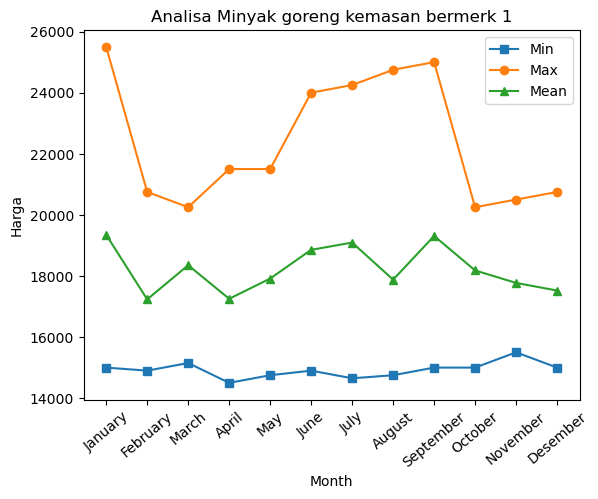

In [33]:
var = ['Minyak goreng kemasan bermerk 1']
dfy1 = df.groupby(['Month']).agg({'Minyak goreng kemasan bermerk 1': ['min', 'max', 'mean']})

# Plot
dfy1['Minyak goreng kemasan bermerk 1']['min'].plot(marker='s', label='Min')
dfy1['Minyak goreng kemasan bermerk 1']['max'].plot(marker='o', label='Max')
dfy1['Minyak goreng kemasan bermerk 1']['mean'].plot(marker='^', label='Mean')
                                                           
# Label dan judul
plt.ylabel('Harga')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Desember'], rotation=40),
plt.title('Analisa Minyak goreng kemasan bermerk 1')
                                                           
# Legenda
plt.legend()
                                                           
# Tampilkan plot
plt.show()

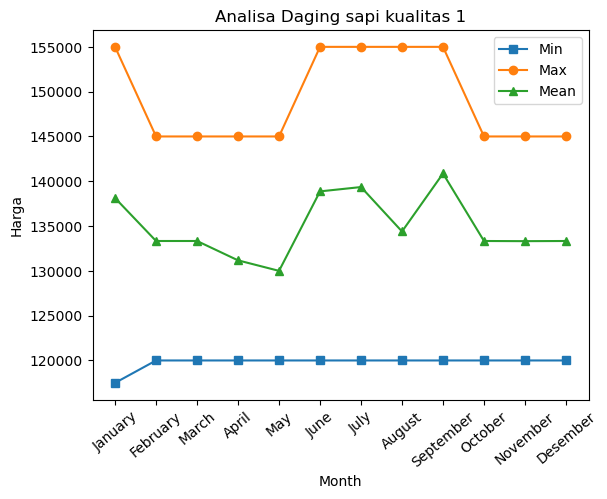

In [29]:
var = ['Daging sapi kualitas 1']
dfy1 = df.groupby(['Month']).agg({'Daging sapi kualitas 1': ['min', 'max', 'mean']})

# Plot
dfy1['Daging sapi kualitas 1']['min'].plot(marker='s', label='Min')
dfy1['Daging sapi kualitas 1']['max'].plot(marker='o', label='Max')
dfy1['Daging sapi kualitas 1']['mean'].plot(marker='^', label='Mean')
                                                           
# Label dan judul
plt.ylabel('Harga')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Desember'], rotation=40),
plt.title('Analisa Daging sapi kualitas 1')
                                                           
# Legenda
plt.legend()
                                                           
# Tampilkan plot
plt.show()

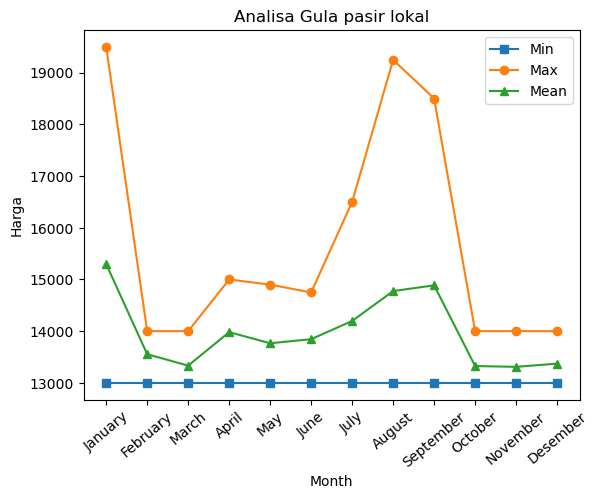

In [30]:
var = ['Gula pasir lokal']
dfy1 = df.groupby(['Month']).agg({'Gula pasir lokal': ['min', 'max', 'mean']})

# Plot
dfy1['Gula pasir lokal']['min'].plot(marker='s', label='Min')
dfy1['Gula pasir lokal']['max'].plot(marker='o', label='Max')
dfy1['Gula pasir lokal']['mean'].plot(marker='^', label='Mean')
                                                           
# Label dan judul
plt.ylabel('Harga')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Desember'], rotation=40),
plt.title('Analisa Gula pasir lokal')
                                                           
# Legenda
plt.legend()
                                                           
# Tampilkan plot
plt.show()

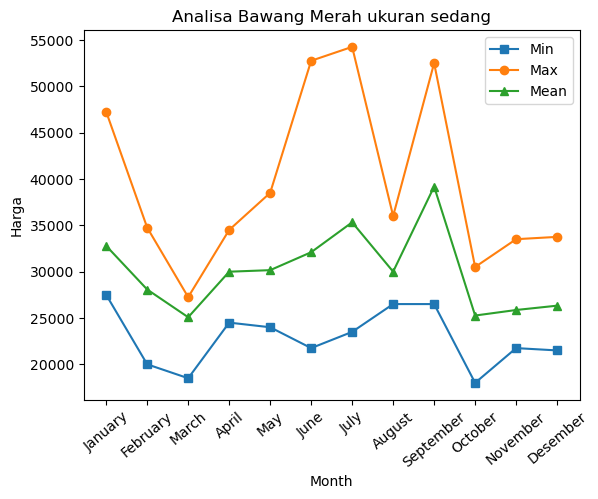

In [31]:
var = ['Bawang Merah ukuran sedang']
dfy1 = df.groupby(['Month']).agg({'Bawang Merah ukuran sedang': ['min', 'max', 'mean']})

# Plot
dfy1['Bawang Merah ukuran sedang']['min'].plot(marker='s', label='Min')
dfy1['Bawang Merah ukuran sedang']['max'].plot(marker='o', label='Max')
dfy1['Bawang Merah ukuran sedang']['mean'].plot(marker='^', label='Mean')
                                                           
# Label dan judul
plt.ylabel('Harga')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Desember'], rotation=40),
plt.title('Analisa Bawang Merah ukuran sedang')
                                                           
# Legenda
plt.legend()
                                                           
# Tampilkan plot
plt.show()

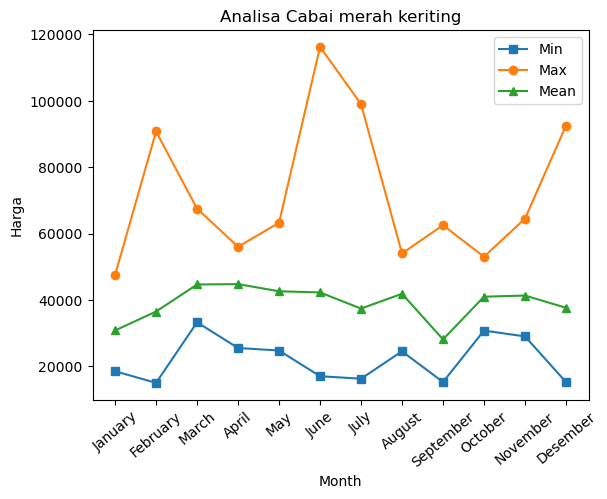

In [32]:
var = ['Cabai merah keriting']
dfy1 = df.groupby(['Month']).agg({'Cabai merah keriting': ['min', 'max', 'mean']})

# Plot
dfy1['Cabai merah keriting']['min'].plot(marker='s', label='Min')
dfy1['Cabai merah keriting']['max'].plot(marker='o', label='Max')
dfy1['Cabai merah keriting']['mean'].plot(marker='^', label='Mean')
                                                           
# Label dan judul
plt.ylabel('Harga')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Desember'], rotation=40),
plt.title('Analisa Cabai merah keriting')
                                                           
# Legenda
plt.legend()
                                                           
# Tampilkan plot
plt.show()